In [19]:
import gym_duckietown
import matplotlib.pyplot as plt
from gym_duckietown.simulator import Simulator
import numpy as np
import scipy.interpolate as ip

from utils import get_trajectory, sort_xy, get_angles

In [6]:
plt.rcParams['figure.figsize'] = [7, 7]

In [7]:
#gym_duckietown is very chatty
import logging
gym_duckietown.logger.setLevel(logging.WARNING)

In [8]:
env = Simulator("small_loop",
    full_transparency=True,
    domain_rand=False,
    user_tile_start=[1,0],
    seed=42,
    max_steps=float("inf"),
)

INFO:duckietown_world: data: /home/giulio/prog/.virtualenvs/RACE/lib/python3.8/site-packages/duckietown_world/data


/home/giulio/prog/duckrace_simulator/utils.py:231: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  points_fitted = np.vstack( spl(alpha) for spl in splines ).T


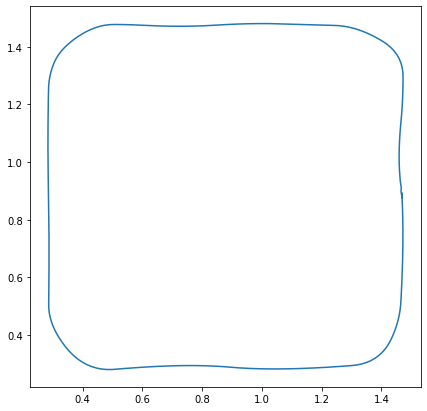

In [67]:
points = get_trajectory(env, samples=200, scaled=True)
x, y = points.T
x_sorted, y_sorted, x0, y0 = sort_xy(x, y, return_origin=True)
angles = get_angles(x_sorted, y_sorted, x0=x0, y0=y0)

angles = np.concatenate([[0], angles, [2*np.pi]])
x_sorted = np.concatenate([[x_sorted[-1]], x_sorted, [x_sorted[0]]])
y_sorted = np.concatenate([[y_sorted[-1]], y_sorted, [y_sorted[0]]])

spline_x = ip.InterpolatedUnivariateSpline(angles, x_sorted)
spline_y = ip.InterpolatedUnivariateSpline(angles, y_sorted)
angles_test = np.linspace(0, 2*np.pi, 300)
plt.plot(spline_x(angles_test), spline_y(angles_test))